<a href="https://colab.research.google.com/github/Sharon414/data/blob/main/SpotifyTracksDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My first Python coding with Spotify Tracks Dataset





In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauthamvijayaraj/spotify-tracks-dataset-updated-every-week")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week/versions/2


In [78]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauthamvijayaraj/spotify-tracks-dataset-updated-every-week")

print("Path to dataset files:", path)

#Load the CSV file
# Assuming the CSV file is named 'spotify_tracks.csv' and is located within the downloaded dataset folder.
file_path = path + '/spotify_tracks.csv'  # Updated file path
df = pd.read_csv(file_path)

# Check the first few rows
print(df.head())

Path to dataset files: /root/.cache/kagglehub/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week/versions/2
                 track_id                                  track_name  \
0  2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1  4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3  5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   

                                         artist_name  year  popularity  \
0                                Anirudh Ravichander  2024          59   
1  Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
3  Anirudh Ravichander, Bharath Sankar, Kabilan, ...  2024          24   
4  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024        

In [79]:
#Basic data exploration
#Check dataset dimensions
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 62317, Number of columns: 22


In [80]:
#View column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [81]:
#Summary statistics for numerical columns
print(df.describe())

               year    popularity  acousticness  danceability   duration_ms  \
count  62317.000000  62317.000000  62317.000000  62317.000000  6.231700e+04   
mean    2014.425935     15.358361      0.362292      0.596807  2.425270e+05   
std        9.645113     18.626908      0.314609      0.186209  1.129999e+05   
min     1971.000000      0.000000     -1.000000     -1.000000  5.000000e+03   
25%     2011.000000      0.000000      0.067100      0.497000  1.921600e+05   
50%     2017.000000      7.000000      0.286000      0.631000  2.362670e+05   
75%     2022.000000     26.000000      0.632000      0.730000  2.862400e+05   
max     2024.000000     93.000000      0.996000      0.986000  4.581483e+06   

             energy  instrumentalness           key      liveness  \
count  62317.000000      62317.000000  62317.000000  62317.000000   
mean       0.602496          0.146215      5.101658      0.194143   
std        0.246144          0.307804      3.553469      0.172030   
min       -1

In [82]:
#Check for missing values
print(df.isnull().sum())

track_id            0
track_name          0
artist_name         0
year                0
popularity          0
artwork_url         0
album_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
track_url           0
language            0
dtype: int64


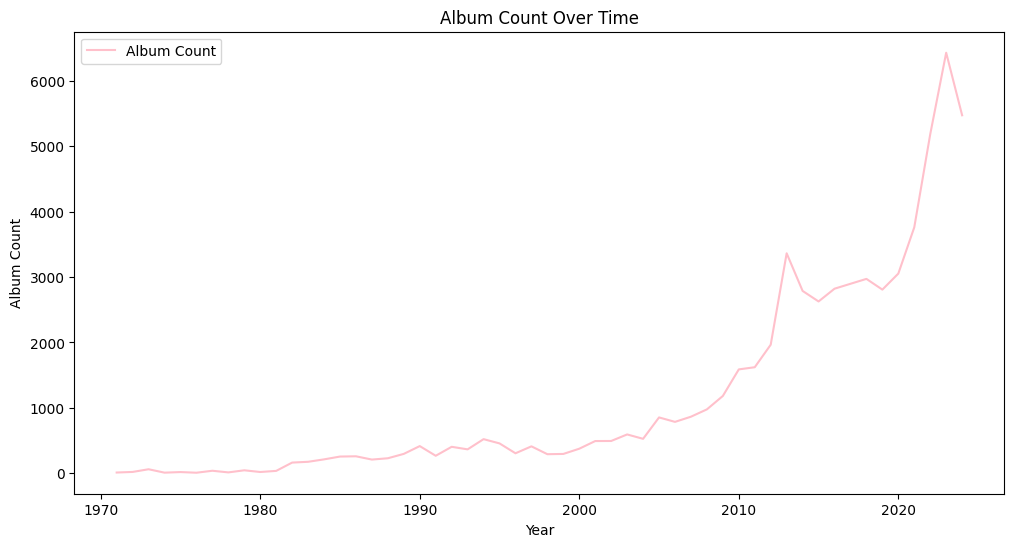

In [83]:
#Analyse trends over time
plt.figure(figsize=(12,6))
# Assuming you want to count the occurrences of each album per year
album_counts = df.groupby('year')['album_name'].count() # Group by 'year' and count 'album_name'
plt.plot(album_counts.index, album_counts.values, label='Album Count', color='pink')
plt.xlabel('Year')
plt.ylabel('Album Count')
plt.title('Album Count Over Time')
plt.legend()
plt.show()

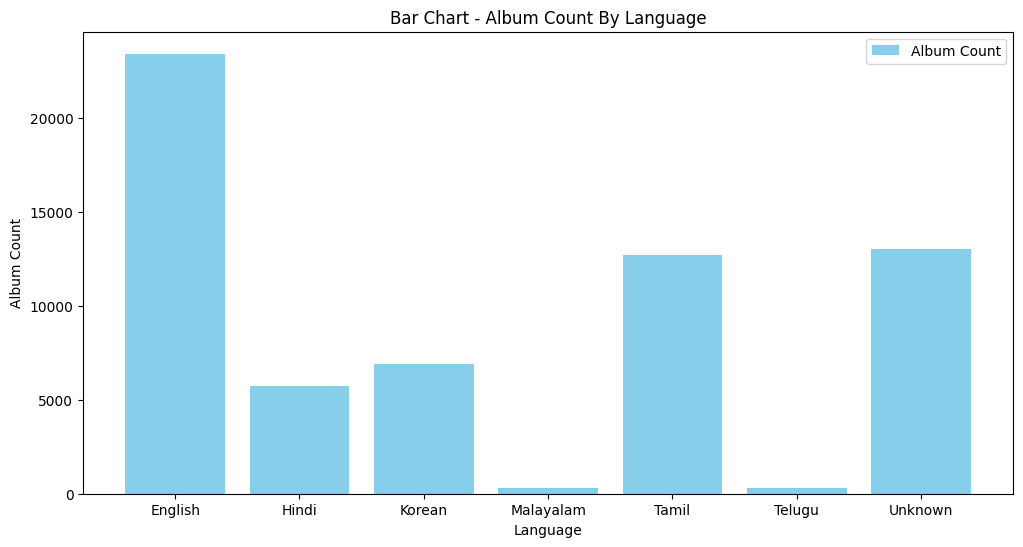

In [84]:
#Analyse language-based Trends
#Album count per year
album_counts = df.groupby('language')['album_name'].count()
plt.figure(figsize=(12,6))
plt.bar(album_counts.index, album_counts.values, label= 'Album Count', color= 'skyblue')
plt.xlabel('Language')
plt.ylabel('Album Count')
plt.title('Bar Chart - Album Count By Language')
plt.legend()
plt.show()

In [85]:
#Count of the number of unknown language
df['language'].value_counts()['Unknown']

13005

In [86]:
#Count of the number of albums by language
df['language'].value_counts()

,count
language,
English,23392
Unknown,13005
Tamil,12681
Korean,6893
Hindi,5740
Telugu,324
Malayalam,282


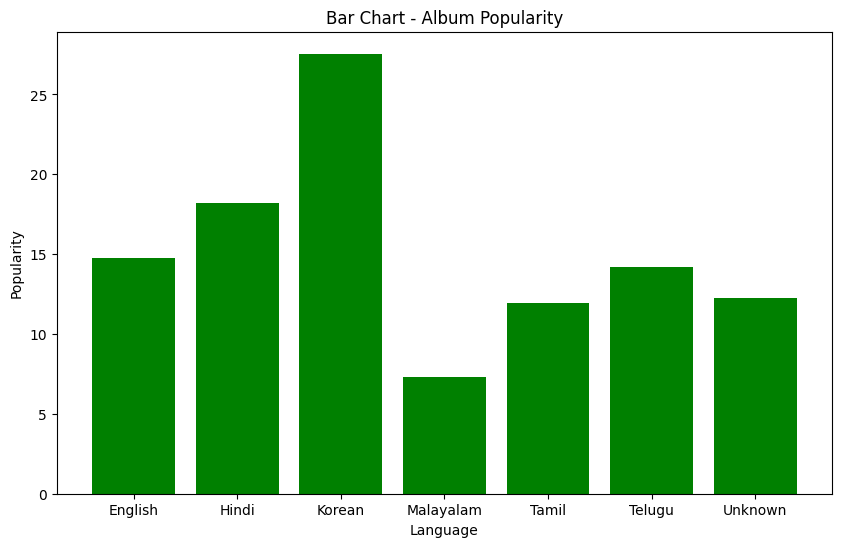

In [87]:
#create a bar chart to analyse the popularity of albums and language
plt.figure(figsize=(10,6))
# Apply an aggregation function-mean to the 'popularity' column
album_popularity = df.groupby('language')['popularity'].mean() # Calculate mean popularity per language
plt.bar(album_popularity.index, album_popularity.values, color = 'green')
plt.xlabel('Language')
plt.ylabel('Popularity')
plt.title('Bar Chart - Album Popularity')
plt.show()